<a href="https://colab.research.google.com/github/Raizel820/Inferential_Statistics/blob/master/sliderule_dsi_inferential_statistics_exercise_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [2]:
%matplotlib inline
import pandas as pd

import subprocess as sp
import sys,os,shutil,pickle,time
import numpy as np
from os.path import join
from matplotlib import pyplot as plt
plt.style.use('default')
# mount Google Drive
from os.path import expanduser
gd_path=join(expanduser("~"),'gd')
if not os.path.isdir(gd_path):
    try:
        # load Google Drive
        from google.colab import drive,files
        drive.mount('/drive')
        sp.call('ln -s /drive/My\ Drive '+gd_path, shell=True)
    except:
        print('unable to find Google Drive Folder')
os.chdir(gd_path+'/MachineLearning')
os.listdir('.')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /drive


['cms_hospital_readmissions.csv',
 'kick_starter.csv',
 'human_body_temperature.csv',
 'craigslistVehiclesFull.csv',
 'PIACCsubset.csv',
 'PIACCsubset.txt',
 'PIACCsubset.xlsx',
 'Data Sets',
 'pycon-pandas-tutorial',
 'notebook_001.ipynb',
 'PIACCsubset.ipynb',
 'data_wrangling_json',
 'steam_reviews.csv',
 'education.csv',
 'pokemon_data.csv',
 'filtered.csv',
 'modified.csv',
 'modified.txt',
 'cars_cleaned.csv']

In [0]:
import pandas as pd

df = pd.read_csv('human_body_temperature.csv')

In [35]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


## 1) Is the distribution of body temperatures normal? 

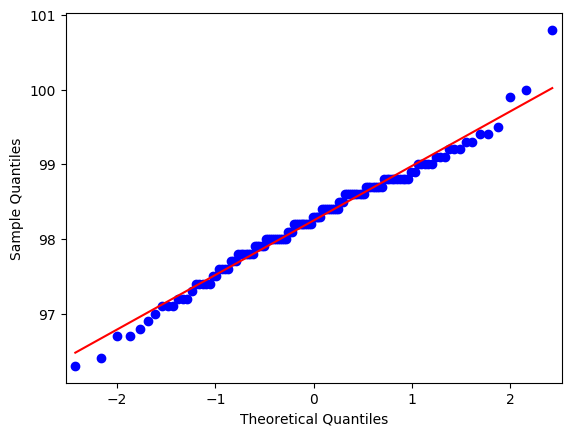

In [12]:
# QQ Plot
from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
# seed the random number generator
seed(1)
# q-q plot
qqplot(df.temperature, line='s')
pyplot.show()

By looking at QQ plot, we can say that temprature is almost normally distributed. On the other hand, we have an outliter point that needs further investigation.

## 2) Is the sample size large? Are the observations independent? 


In [33]:
len(df)

130

130 observation is pretty small. Therefore, while making an interpretation, we need to keep in mind that there might be sampling error due to small sample size.

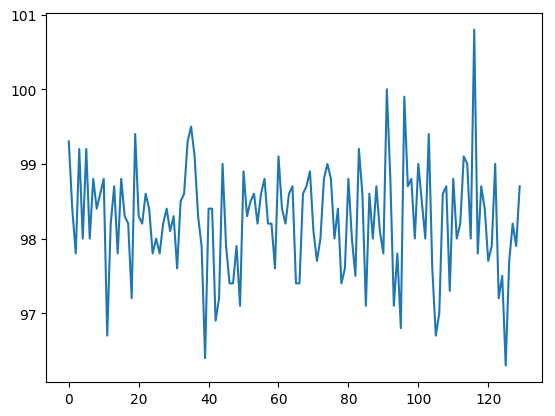

In [34]:
plt.plot(df.temperature)

By looking at the temperature plot, it can be said that observations are independent. 

## 3) Is the true population mean really 98.6 degrees F? 

In [1]:
np.mean(df.temperature)

NameError: ignored

In [13]:
# True pupolation is the confidence interval
from scipy.stats import sem, t
from scipy import mean
confidence = 0.95
data = df.temperature

n = len(data)
m = mean(data)
std_err = sem(data)
h = std_err * t.ppf((1 + confidence) / 2, n - 1)

start = m - h
start
end = m + h
end


98.37645863285351

In [32]:
print('Confidence Interval: ', start,',', end)

Confidence Interval:  97.41708991178415 , 98.68291008821585


As we can see here, true population mean should be between 98.12200290560804  and 98.37645863285351. Therefore, 95% chance, 98.6 degress is not in the interval of the true population mean. 

##### Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why? 
I use one sample t-test because we are examining just one variable.

##### In this situation, is it appropriate to use the t or z statistic?
z-test is approritae because sample number is higher than 30. 

In [14]:
from statsmodels.stats import weightstats as stests
import numpy as np

singleValue=3.3

# Assuming data are normally distributed, we can do z-test
testResult=stests.ztest(data,value=singleValue)
pValue=testResult[1]
print("p-value is: "+str(pValue))
print("")

p-value is: 0.0



## 4) Draw a small sample of size 10 from the data and repeat both frequentist tests. 


In [16]:
df2= np.random.choice(data, 10, replace=False)
df2

array([98.7, 96.7, 99.5, 97.5, 98.6, 98.9, 97.1, 97.4, 98.2, 97.9])

##### Which one is the correct one to use?
For this one, t-test is correc to use because number of sample is lower tha 30.
##### What do you notice? What does this tell you about the difference in application of the t and z statistic? 
  They are used for difference sample sizes. 30 is the cut off point.

## 5) At what temperature should we consider someone's temperature to be "abnormal"?

In [17]:
# True pupolation is the confidence interval
from scipy.stats import sem, t
from scipy import mean
confidence = 0.95
data = df2

n = len(data)
m = mean(data)
std_err = sem(data)
h = std_err * t.ppf((1 + confidence) / 2, n - 1)

start = m - h
start
end = m + h
end

98.68291008821585

In [30]:
print('Confidence Interval: ', start,',', end)

Confidence Interval:  97.41708991178415 , 98.68291008821585


## 6) Is there a significant difference between males and females in normal temperature?
    What testing approach did you use and why?
    Write a story with your conclusion in the context of the original problem. 

In [29]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [0]:
male_temps = []

for e,i in enumerate(df['gender']):
    if i == 'M':
        male_temps.append(df['temperature'][e])

In [0]:
female_temps = []

for e,i in enumerate(df['gender']):
    if i == 'F':
        female_temps.append(df['temperature'][e])

In [54]:
male_temps

[97.8,
 99.2,
 98.0,
 98.8,
 98.2,
 98.2,
 99.4,
 98.2,
 98.6,
 98.4,
 97.8,
 98.1,
 98.3,
 98.5,
 98.6,
 99.3,
 99.5,
 99.1,
 98.3,
 98.4,
 96.9,
 97.2,
 97.4,
 97.4,
 97.9,
 97.1,
 98.6,
 98.2,
 97.6,
 98.4,
 98.6,
 97.4,
 98.6,
 98.9,
 98.0,
 98.8,
 99.0,
 98.8,
 98.4,
 97.4,
 97.6,
 98.0,
 97.5,
 97.1,
 98.0,
 98.7,
 98.1,
 97.8,
 97.1,
 97.8,
 98.0,
 99.0,
 98.5,
 97.6,
 96.7,
 97.0,
 98.6,
 97.3,
 99.0,
 98.0,
 98.7,
 97.5,
 96.3,
 97.7,
 97.9]

In [27]:
from scipy import stats
stats.ttest_ind(male_temps, female_temps)  

Ttest_indResult(statistic=-2.2854345381656103, pvalue=0.02393188312239561)

In [47]:
mean(male_temps)


98.10461538461537

In [46]:
mean(female_temps)

98.39384615384614

For this analysis, I used t-test for testing the significance of the difference between body tempretaure of males and females. We got a p value< 0.05. Therefore, we can conclude that there is a significant difference between body temprature of males and females. On the other hand, this statistical significance does not mean that it's pratically significant. We we look at the mean values of body temprature of the M and F, we can see that they are so close to each other.